<a href="https://colab.research.google.com/github/rushil1510/BTP/blob/main/BTP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the datasheet onto colab

In [ ]:
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

In [2]:
import pandas as pd

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the Excel file into a DataFrame (first sheet by default)
df = pd.read_excel(file_name)

# Display the first few rows of the DataFrame
print(df.head())


   CH4  C3H8   Equivalence_Ratio   Compression Pressure(atm)  \
0  1.0   0.0                 0.5                           1   
1  1.0   0.0                 0.5                           1   
2  1.0   0.0                 0.5                           1   
3  1.0   0.0                 0.5                           1   
4  1.0   0.0                 0.5                           1   

    Compression Temperature(K)   1000/T_(1/K)   Ignition_time  time  \
0                     700.0000       1.428571             0.0   0.0   
1                     708.0808       1.412268             0.0   0.0   
2                     716.1616       1.396333             0.0   0.0   
3                     724.2424       1.380753             0.0   0.0   
4                     732.3232       1.365517             0.0   0.0   

   Unnamed: 8 Unnamed: 9  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  


In [3]:
df = df.iloc[:, :-2]

In [4]:
# prompt: remove the last two columns, and the column titled ignition_time from df

df = df.drop(columns=[' Ignition_time'])

Cleaning up the data

In [5]:
df.describe()
print(df.shape)
print(df.dtypes)
df.columns = ['x', 'y','phi','p','T','1000/T','idt']
print(df.columns)
df = df[df['p'] != 10].reset_index(drop=True)

(1400, 7)
CH4                            float64
C3H8                           float64
 Equivalence_Ratio             float64
 Compression Pressure(atm)       int64
 Compression Temperature(K)    float64
 1000/T_(1/K)                  float64
time                           float64
dtype: object
Index(['x', 'y', 'phi', 'p', 'T', '1000/T', 'idt'], dtype='object')


Data preprocessing

In [6]:
import numpy as np
df['phi'] = df['phi'].replace(np.nan, 0.5)

In [8]:
# prompt: drop the rows where df['time']=0

df = df[df['idt'] != 0].reset_index(drop=True)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 139251.2031 - val_loss: 120777.4688
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120002.7812 - val_loss: 75980.5703
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76925.4844 - val_loss: 41420.1562
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75663.0234 - val_loss: 22735.4219
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71312.2891 - val_loss: 15820.5391
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64320.8203 - val_loss: 12831.7598
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75017.4219 - val_loss: 13075.9775
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62950.7227 - val_loss: 12352.8330
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96352.2578 - val_loss: 13989.3086
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 117742.1562 - val_loss: 14367.7725
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60781.3398 - val

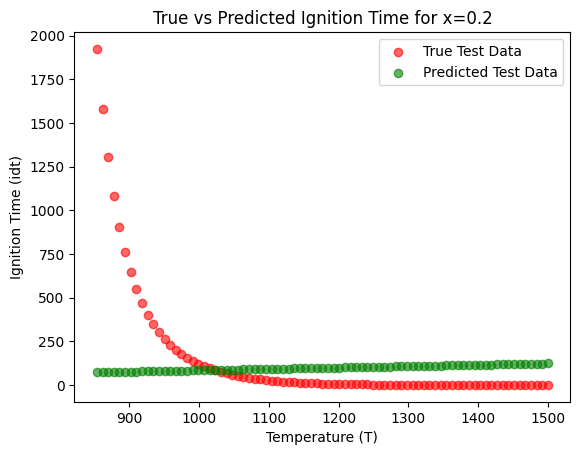

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Split data based on `x` value
train_df = df[df['x'] != 0.2]  # All rows where x is not 0.2
test_df = df[df['x'] == 0.2]   # All rows where x is 0.2

# Separate features and target
X_train = train_df.drop(columns=['idt']).values
y_train = train_df['idt'].values
X_test = test_df.drop(columns=['idt']).values
y_test = test_df['idt'].values

# 2. Define and train the model using only the training set
model_tf = Sequential([
    Dense(16, input_shape=(6,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer
])

# Compile and train the model
model_tf.compile(optimizer='adam', loss='mse')
model_tf.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 3. Predict `idt` values for the test set
test_predictions = model_tf.predict(X_test)

# 4. Plot actual vs predicted `idt` values for test data
# Extract temperature from test data for plotting (assuming T is the 5th column)
T_test = X_test[:, 4]  # Replace 4 if `T` is in a different column

plt.scatter(T_test, y_test, color='red', label='True Test Data', alpha=0.6)
plt.scatter(T_test, test_predictions, color='green', label='Predicted Test Data', alpha=0.6)

plt.xlabel('Temperature (T)')
plt.ylabel('Ignition Time (idt)')
plt.title('True vs Predicted Ignition Time for x=0.2')
plt.legend()
plt.show()

In [10]:
# Flatten test_predictions to a 1D array for easier comparison
test_predictions_flat = test_predictions.flatten()

# Calculate the difference between actual and predicted values
differences = y_test - test_predictions_flat

# Create a DataFrame to display all relevant information side by side
comparison_df = pd.DataFrame({
    'x': test_df['x'].values,
    'y': test_df['y'].values,
    'phi': test_df['phi'].values,
    'T': test_df['T'].values,
    'Actual idt': y_test,
    'Predicted idt': test_predictions_flat,
    'Difference': differences
})

# Print the comparison DataFrame
print(comparison_df)

      x    y  phi          T   Actual idt  Predicted idt   Difference
0   0.2  0.8  0.5   853.5354  1924.500000      72.234383  1852.265617
1   0.2  0.8  0.5   861.6162  1580.287000      72.862091  1507.424909
2   0.2  0.8  0.5   869.6970  1305.462000      73.490021  1231.971979
3   0.2  0.8  0.5   877.7778  1084.904000      74.118141  1010.785859
4   0.2  0.8  0.5   885.8586   906.974100      74.746468   832.227632
..  ...  ...  ...        ...          ...            ...          ...
76  0.2  0.8  0.5  1467.6770     0.101726     120.293404  -120.191677
77  0.2  0.8  0.5  1475.7580     0.092517     120.928520  -120.836003
78  0.2  0.8  0.5  1483.8380     0.085224     121.563629  -121.478405
79  0.2  0.8  0.5  1491.9190     0.077683     122.198837  -122.121154
80  0.2  0.8  0.5  1500.0000     0.071486     122.834099  -122.762613

[81 rows x 7 columns]


We see that when we feed a new isolated value of x (and ofcourse a corresponding temperature series) into the model, it makes some terrible predictions and is unable to understand any trends.


Very clearly the ANN is unable to predict the value of T at which the 'spike' is supposed to show up

Let's try this process for different values of x

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 56: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 61: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 61: early stopping
Restoring model weights from the end of the best epoch: 51.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Results for x=0.2 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.316406    0.028311
1   0.2  0.8  0.5   853.5354    7.562421       5.621094    1.941328
2   0.2  0.8  0.5  1031.3130    4.316119       3.925781    0.390338
3   0.2  0.8  0.5  1104.0400    3.219191       3.238281   -0.019090
4   0.2  0.8  0.5   998.9899    4.797872       4.226562    0.571309
5   0.2  0.8  0.5  1079.7980    3.592467 

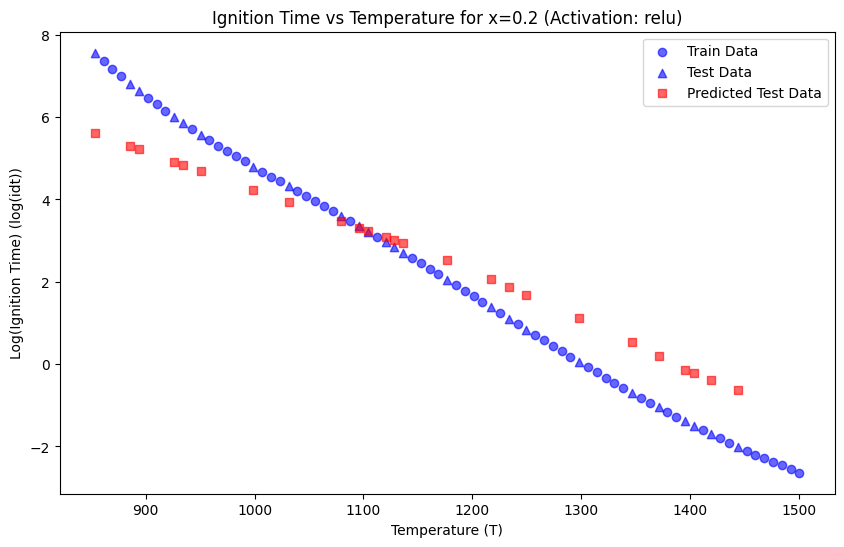

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Results for x=0.2 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       1.486328    1.858390
1   0.2  0.8  0.5   853.5354    7.562421       1.635742    5.926679
2   0.2  0.8  0.5  1031.3130    4.316119       1.528320    2.787799
3   0.2  0.8  0.5  1104.0400    3.219191       1.481445    1.737746
4   0.2  0.8  0.5   998.9899    4.797872       1.548828    3.249044
5   0.2  0.8  0.5  1079.7980    3.592467       1.499023    2.093444
6   0.2  0.8  0.5   934.3434    5.850882       1.585938    4.264944
7   0.2  0.8  0.5  1419.1920   -1.704948       1.291992   -2.996940
8   0.2  0.8  0.5   885.8586    6.810114       1.616211    5.19

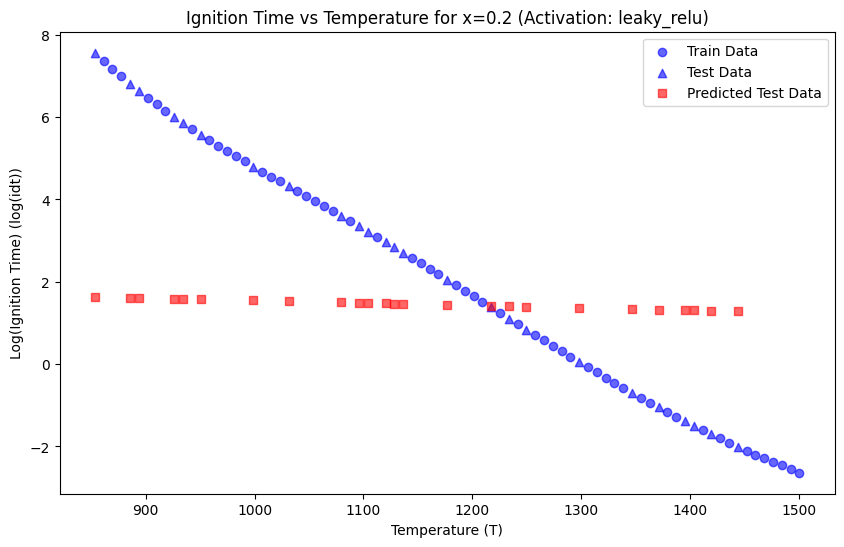

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Results for x=0.2 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.283203    0.061515
1   0.2  0.8  0.5   853.5354    7.562421       5.804688    1.757734
2   0.2  0.8  0.5  1031.3130    4.316119       3.990234    0.325885
3   0.2  0.8  0.5  1104.0400    3.219191       3.191406    0.027785
4   0.2  0.8  0.5   998.9899    4.797872       4.332031    0.465841
5   0.2  0.8  0.5  1079.7980    3.592467       3.457031    0.135436
6   0.2  0.8  0.5   934.3434    5.850882       5.000000    0.850882
7   0.2  0.8  0.5  1419.1920   -1.704948      -0.577148   -1.127800
8   0.2  0.8  0.5   885.8586    6.810114       5.488281    1.321833
9

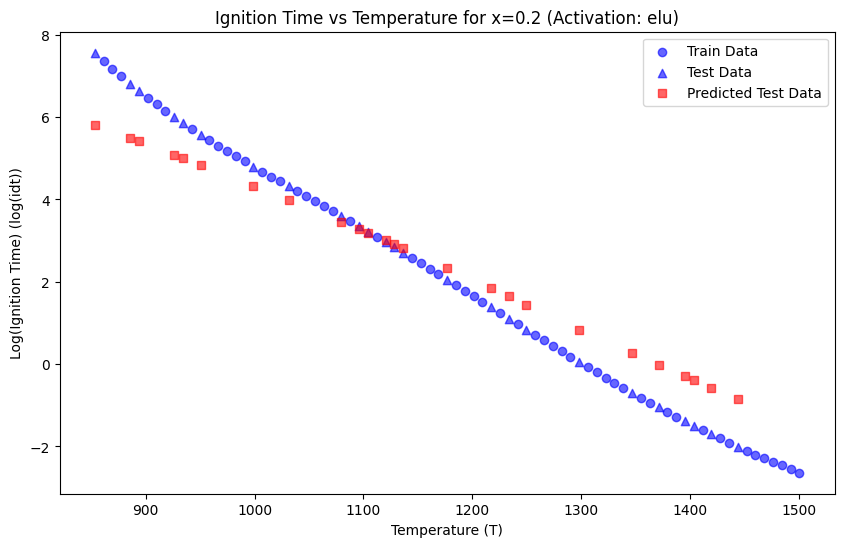

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 41: early stopping
Restoring model weights from the end of the best epoch: 31.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Results for x=0.2 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.812500    0.532218
1   0.2  0.8  0.5   853.5354    7.562421       5.335938    2.226484
2   0.2  0.8  0.5  1031.3130    4.316119       3.599609    0.716510
3   0.2  0.8  0.5  1104.0400    3.219191       2.720703    0.498488
4   0.2  0.8  0.5   998.9899    4.797872       3.980469    0.817403
5   0.2  0.8  0.5  1079.7980    3.592467       2.994141    0.598326
6   0.2  0.8  0.5   934.3434    5.850882       4.664062    1.186819
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.441406   -0.263542
8   0.2  0.8  0.5   885.8586    6.810114       5.085938    1.724176


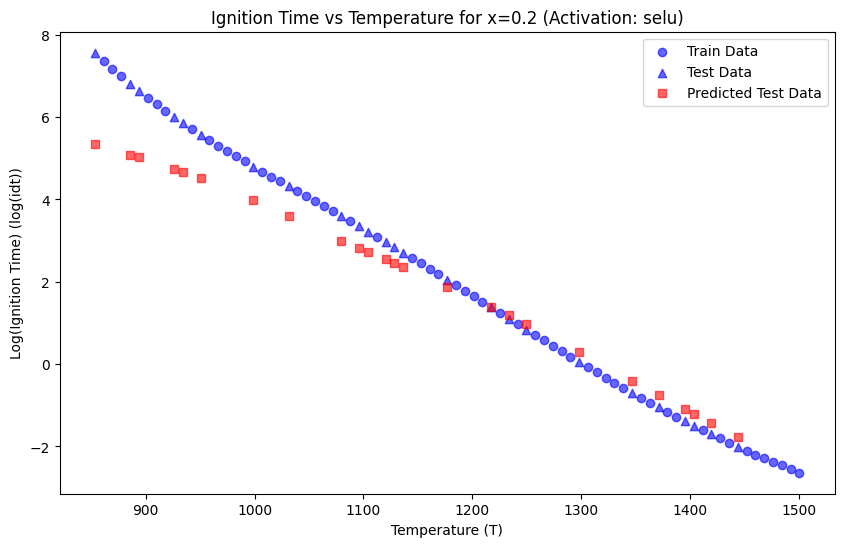

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Results for x=0.2 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       1.722656    1.622061
1   0.2  0.8  0.5   853.5354    7.562421       2.699219    4.863203
2   0.2  0.8  0.5  1031.3130    4.316119       2.003906    2.312213
3   0.2  0.8  0.5  1104.0400    3.219191       1.687500    1.531691
4   0.2  0.8  0.5   998.9899    4.797872       2.136719    2.661153
5   0.2  0.8  0.5  1079.7980    3.592467       1.794922    1.797545
6   0.2  0.8  0.5   934.3434    5.850882       2.392578    3.458304
7   0.2  0.8  0.5  1419.1920   -1.704948       0.020264

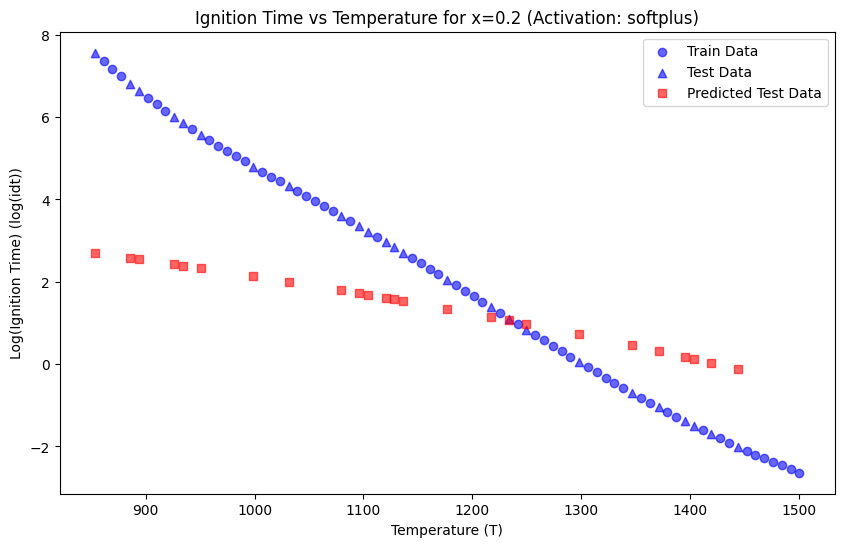

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Results for x=0.2 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718      -0.487793    3.832511
1   0.2  0.8  0.5   853.5354    7.562421      -0.462158    8.024580
2   0.2  0.8  0.5  1031.3130    4.316119      -0.473633    4.789752
3   0.2  0.8  0.5  1104.0400    3.219191      -0.482910    3.702102
4   0.2  0.8  0.5   998.9899    4.797872      -0.489258    5.287130
5   0.2  0.8  0.5  1079.7980    3.592467      -0.484863    4.077330
6   0.2  0.8  0.5   934.3434    5.850882      -0.473389    6.324270
7   0.2  0.8  0.5  1419.1920   -1.704948      -0.508301   -1.196647
8   0.2  0.8  0.5   885.8586    6.810114      -0.481201    7.291315
9

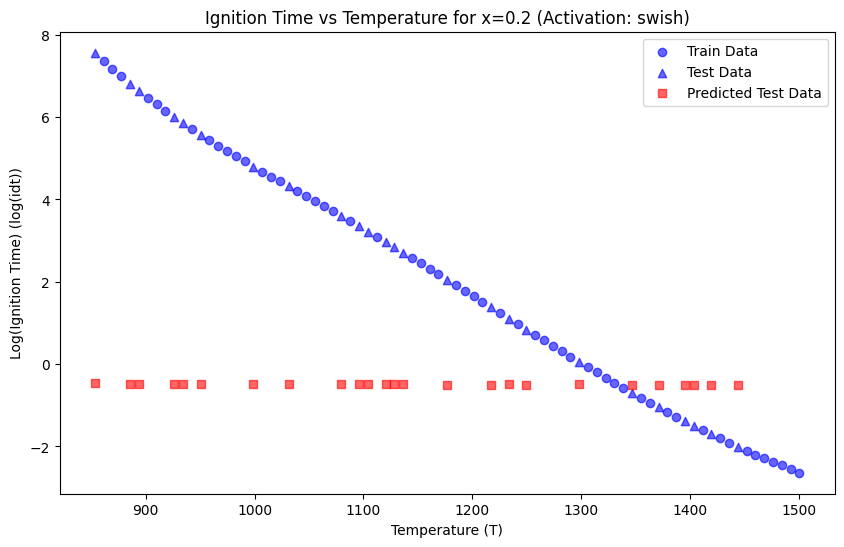

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Results for x=0.2 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       1.152344    2.192374
1   0.2  0.8  0.5   853.5354    7.562421       0.684082    6.878339
2   0.2  0.8  0.5  1031.3130    4.316119       1.030273    3.285846
3   0.2  0.8  0.5  1104.0400    3.219191       1.166016    2.053176
4   0.2  0.8  0.5   998.9899    4.797872       0.969727    3.828145
5   0.2  0.8  0.5  1079.7980    3.592467       1.123047    2.469420
6   0.2  0.8  0.5   934.3434    5.850882       0.851562    4.999319
7   0.2  0.8  0.5  1419.1920   -1.704948       1.735352   -3.440300
8   0.2  0.8  0.5   885.8586    6.810114       0.750977    6.059137
9 

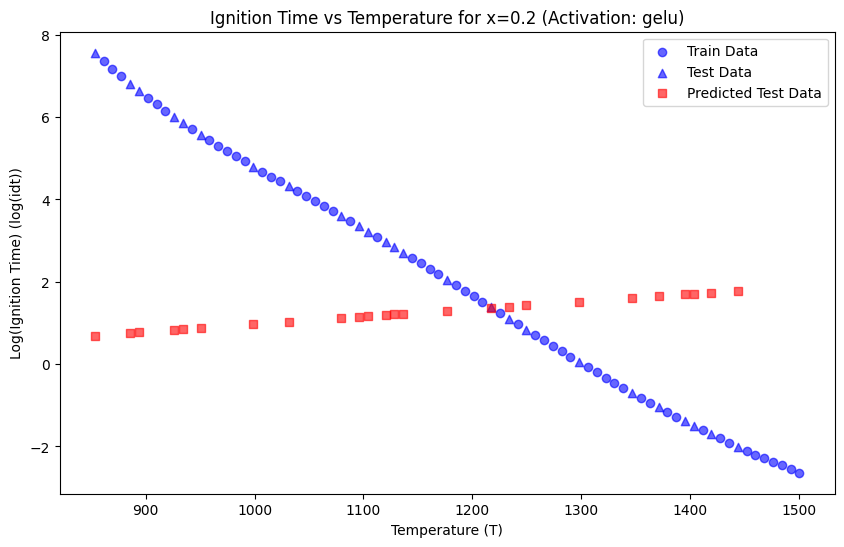

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Results for x=0.4 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.667969    0.656732
1   0.4  0.6  0.5   861.6162    7.452467       5.871094    1.581374
2   0.4  0.6  0.5  1039.3940    4.321417       3.457031    0.864386
3   0.4  0.6  0.5  1112.1210    3.194919       2.564453    0.630466
4   0.4  0.6  0.5  1007.0710    4.802986       3.843750    0.959236
5   0.4  0.6  0.5  1087.8790    3.580634       2.859375    0.721259
6   0.4  0.6  0.5   942.4242    5.821275       4.628906    1.192368
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.374512   -1.367915
8   0.4  0.6  0.5   893.9394    6.733608       5.339844    1.393764


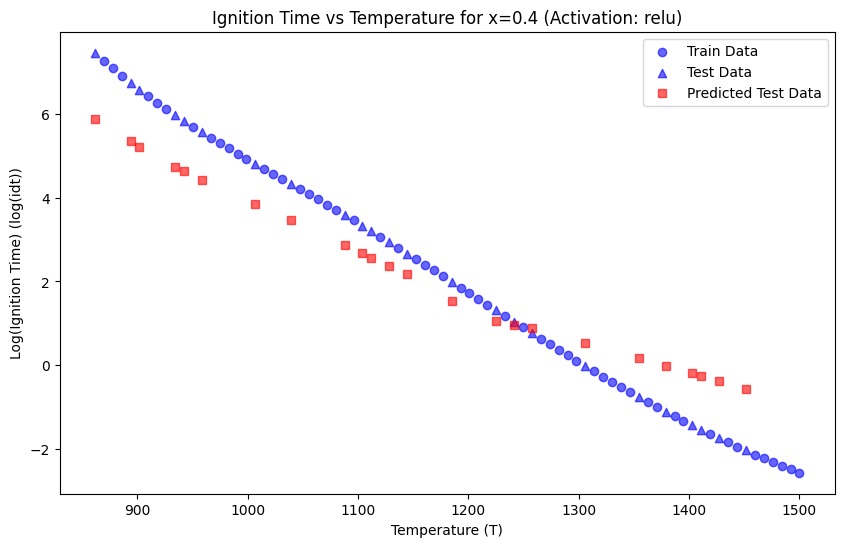

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 49: early stopping
Restoring model weights from the end of the best epoch: 39.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Results for x=0.4 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.431641    0.893060
1   0.4  0.6  0.5   861.6162    7.452467       5.230469    2.221999
2   0.4  0.6  0.5  1039.3940    4.321417       3.148438    1.172980
3   0.4  0.6  0.5  1112.1210    3.194919       2.349609    0.845310
4   0.4  0.6  0.5  1007.0710    4.802986       3.525391    1.277595
5   0.4  0.6  0.5  1087.8790    3.580634       2.593750    0.986884
6   0.4  0.6  0.5   942.4242    5.821275       4.281250    1.540025
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.690430   -1.051997
8   0.4  0.6  0.5   893.9394    6.733608       4.851562    1.8

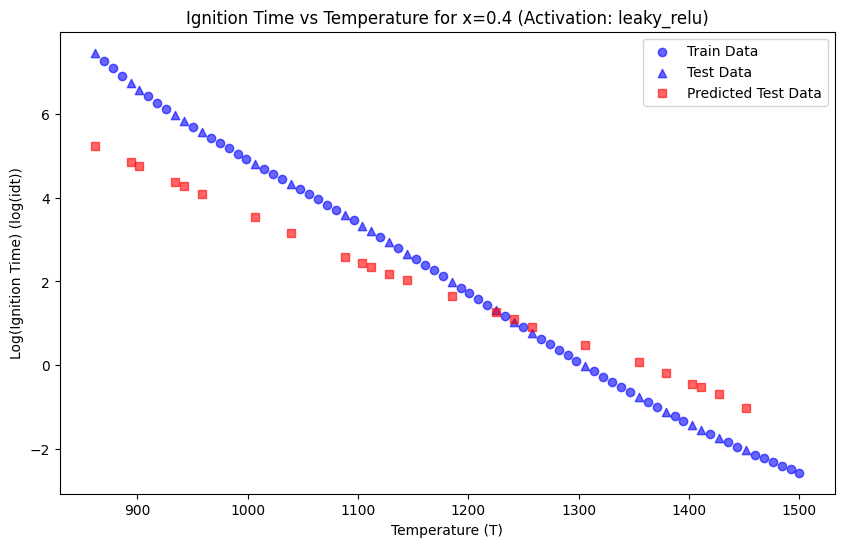

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 13.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Results for x=0.4 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.005859    2.318842
1   0.4  0.6  0.5   861.6162    7.452467       2.871094    4.581374
2   0.4  0.6  0.5  1039.3940    4.321417       1.438477    2.882941
3   0.4  0.6  0.5  1112.1210    3.194919       0.956055    2.238864
4   0.4  0.6  0.5  1007.0710    4.802986       1.673828    3.129158
5   0.4  0.6  0.5  1087.8790    3.580634       1.106445    2.474189
6   0.4  0.6  0.5   942.4242    5.821275       2.175781    3.645493
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.297852   -1.444575
8   0.4  0.6  0.5   893.9394    6.733608       2.591797    4.141811
9

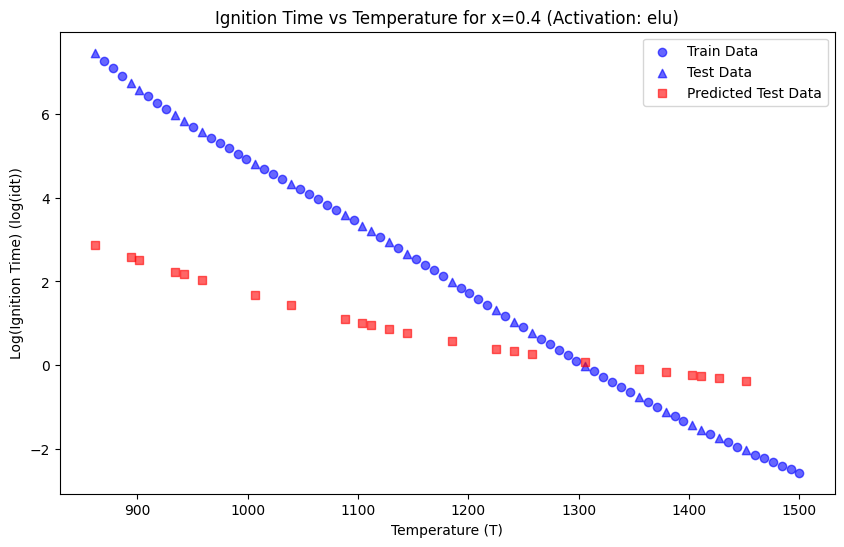

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 25.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Results for x=0.4 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.523438    0.801264
1   0.4  0.6  0.5   861.6162    7.452467       5.039062    2.413405
2   0.4  0.6  0.5  1039.3940    4.321417       3.484375    0.837042
3   0.4  0.6  0.5  1112.1210    3.194919       2.410156    0.784763
4   0.4  0.6  0.5  1007.0710    4.802986       3.863281    0.939705
5   0.4  0.6  0.5  1087.8790    3.580634       2.750000    0.830634
6   0.4  0.6  0.5   942.4242    5.821275       4.472656    1.348618
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.053711   -0.688716
8   0.4  0.6  0.5   893.9394    6.733608       4.828125    1.905483


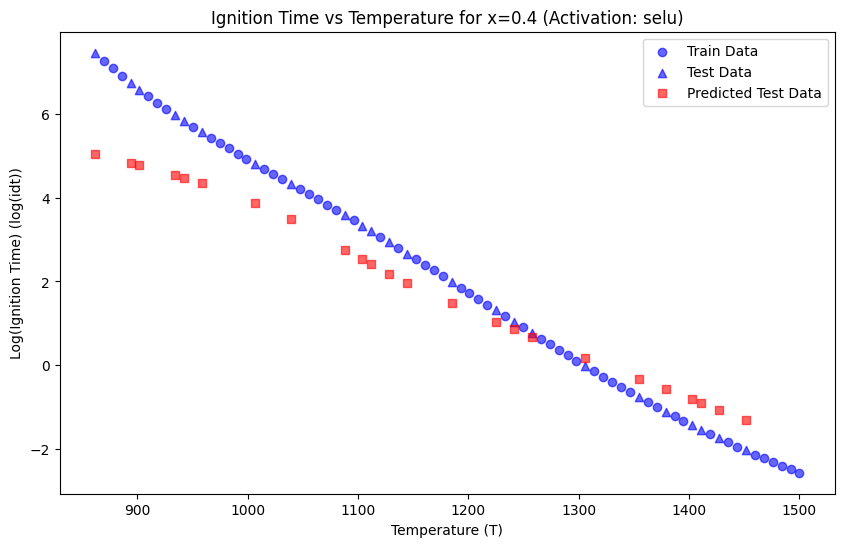

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Results for x=0.4 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       0.894043    2.430658
1   0.4  0.6  0.5   861.6162    7.452467       0.630371    6.822096
2   0.4  0.6  0.5  1039.3940    4.321417       0.827637    3.493781
3   0.4  0.6  0.5  1112.1210    3.194919       0.905273    2.289646
4   0.4  0.6  0.5  1007.0710    4.802986       0.783203    4.019783
5   0.4  0.6  0.5  1087.8790    3.580634       0.880371    2.700263
6   0.4  0.6  0.5   942.4242    5.821275       0.716309    5.104966
7   0.4  0.6  0.5  1427.2730   -1.742427       1.263672   -3.006098
8   0.4  0.6  0.5   893.9394    6.733608       0.664551    6.069057

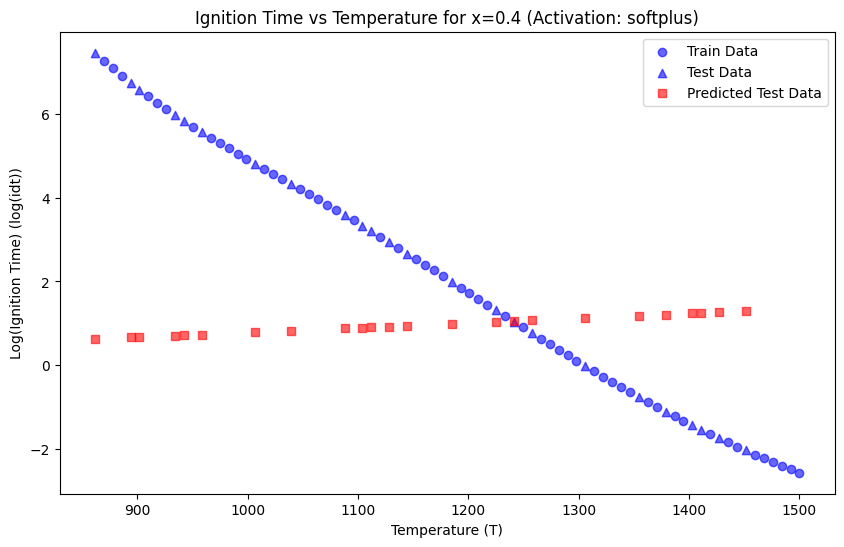

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Results for x=0.4 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.294922    1.029779
1   0.4  0.6  0.5   861.6162    7.452467       3.017578    4.434889
2   0.4  0.6  0.5  1039.3940    4.321417       2.712891    1.608527
3   0.4  0.6  0.5  1112.1210    3.194919       2.234375    0.960544
4   0.4  0.6  0.5  1007.0710    4.802986       2.859375    1.943611
5   0.4  0.6  0.5  1087.8790    3.580634       2.410156    1.170478
6   0.4  0.6  0.5   942.4242    5.821275       3.031250    2.790025
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.504883   -1.237544
8   0.4  0.6  0.5   893.9394    6.733608       3.044922    3.688686

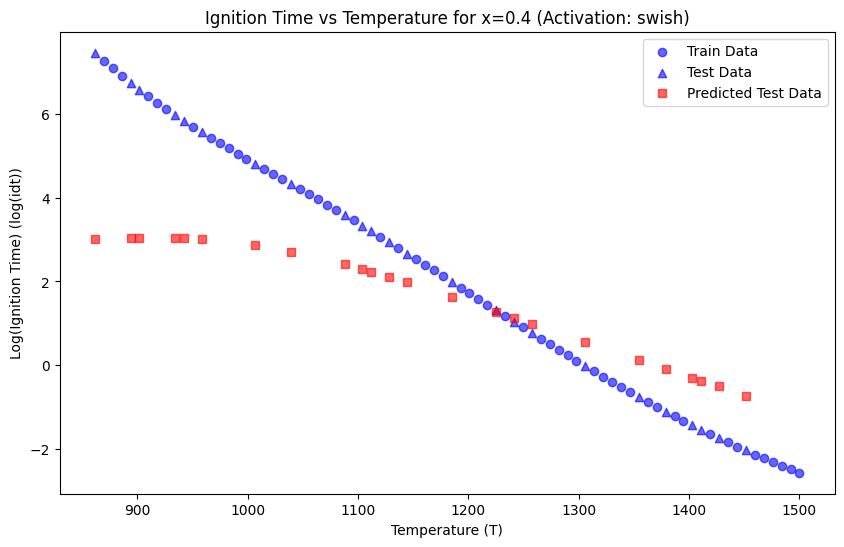

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 31: early stopping
Restoring model weights from the end of the best epoch: 21.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Results for x=0.4 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.632812    0.691889
1   0.4  0.6  0.5   861.6162    7.452467       4.554688    2.897780
2   0.4  0.6  0.5  1039.3940    4.321417       3.218750    1.102667
3   0.4  0.6  0.5  1112.1210    3.194919       2.556641    0.638279
4   0.4  0.6  0.5  1007.0710    4.802986       3.498047    1.304939
5   0.4  0.6  0.5  1087.8790    3.580634       2.779297    0.801337
6   0.4  0.6  0.5   942.4242    5.821275       4.011719    1.809556
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.727051   -1.015376
8   0.4  0.6  0.5   893.9394    6.733608       4.355469    2.378139


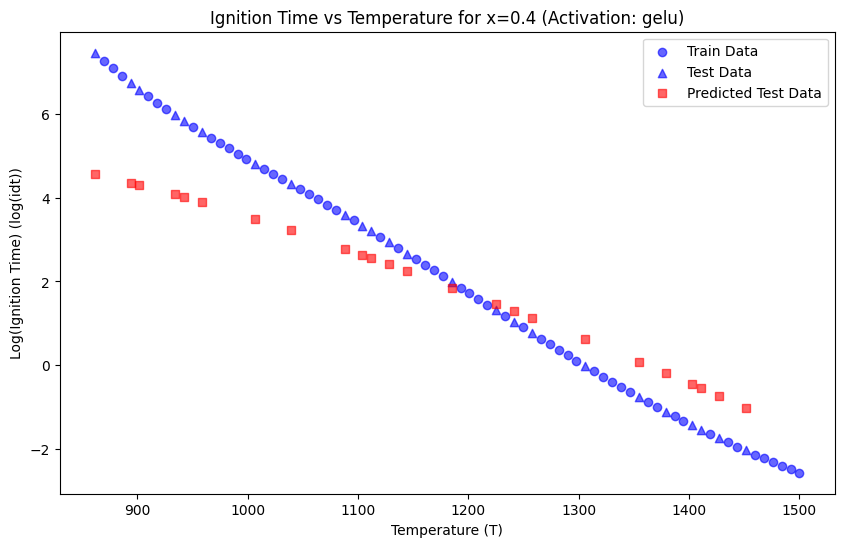

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 55: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 45.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.6 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.386719    0.115805
1   0.6  0.4  0.5   861.6162    7.596330       5.328125    2.268205
2   0.6  0.4  0.5  1039.3940    4.529353       3.972656    0.556697
3   0.6  0.4  0.5  1112.1210    3.368390       3.312500    0.055890
4   0.6  0.4  0.5  1007.0710    5.015671       4.265625    0.750046
5   0.6  0.4  0.5  1087.8790    3.767292       3.533203    0.234089
6   0.6  0.4  0.5   942.4242    6.013630       4.8

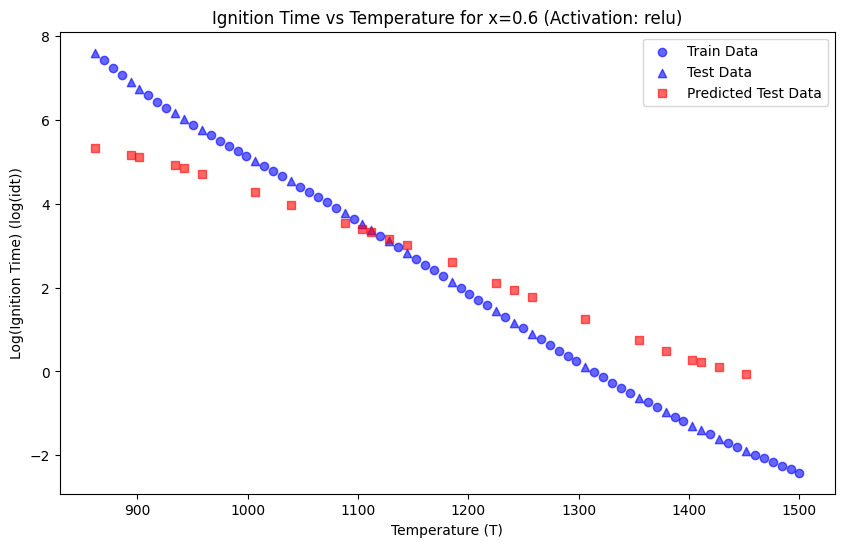

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.6 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       0.854492    2.648032
1   0.6  0.4  0.5   861.6162    7.596330       0.323242    7.273087
2   0.6  0.4  0.5  1039.3940    4.529353       0.706055    3.823298
3   0.6  0.4  0.5  1112.1210    3.368390       0.870117    2.498273
4   0.6  0.4  0.5  1007.0710    5.015671       0.634766    4.380905
5   0.6  0.4  0.5  1087.8790    3.767292       0.811523    2.955769
6   0.6  0.4  0.5   942.4242    6.013630       0.504395    5.509235
7   0.6  0.4  0.5  1427.2730   -1.603043       1.526367   -3.129411
8   0.6  0.4  0.5   893.9394    6.896028       0.394287    6.50

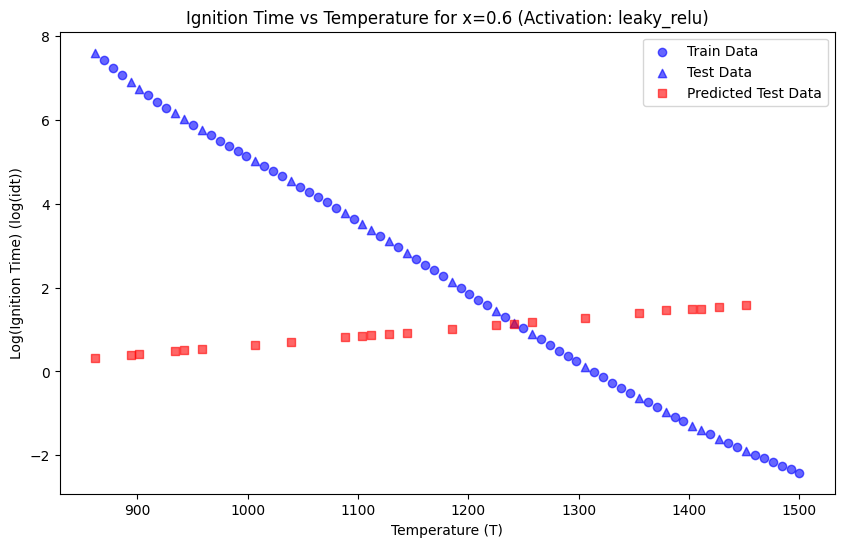

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Results for x=0.6 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.017578    1.484946
1   0.6  0.4  0.5   861.6162    7.596330       1.628906    5.967423
2   0.6  0.4  0.5  1039.3940    4.529353       1.920898    2.608455
3   0.6  0.4  0.5  1112.1210    3.368390       2.029297    1.339094
4   0.6  0.4  0.5  1007.0710    5.015671       1.863281    3.152389
5   0.6  0.4  0.5  1087.8790    3.767292       1.999023    1.768269
6   0.6  0.4  0.5   942.4242    6.013630       1.758789    4.254841
7   0.6  0.4  0.5  1427.2730   -1.603043       2.529297   -4.132340
8   0.6  0.4  0.5   893.9394    6.896028       1.687500    5.208528
9  

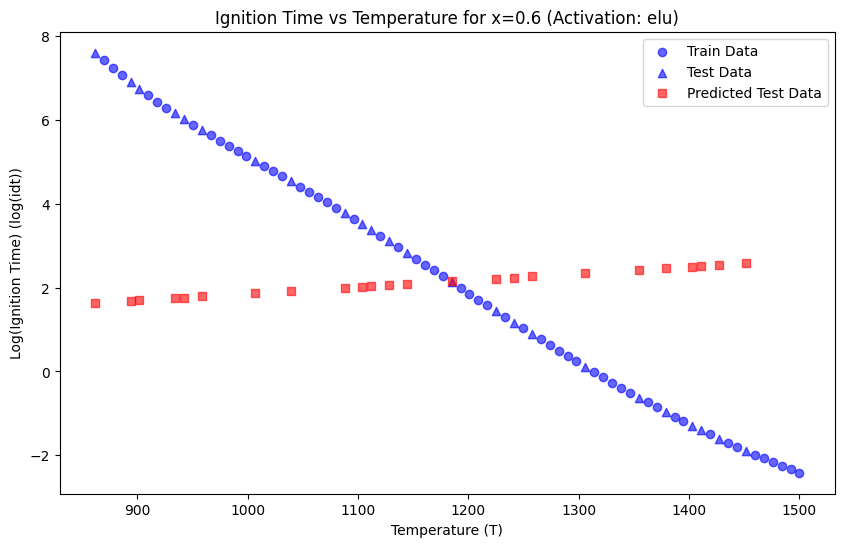

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 57: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 47.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Results for x=0.6 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.152344    0.350180
1   0.6  0.4  0.5   861.6162    7.596330       6.140625    1.455705
2   0.6  0.4  0.5  1039.3940    4.529353       4.031250    0.498103
3   0.6  0.4  0.5  1112.1210    3.368390       3.044922    0.323469
4   0.6  0.4  0.5  1007.0710    5.015671       4.398438    0.617233
5   0.6  0.4  0.5  1087.8790    3.767292       3.373047    0.394245
6   0.6  0.4  0.5   942.4242    6.013630       5.1

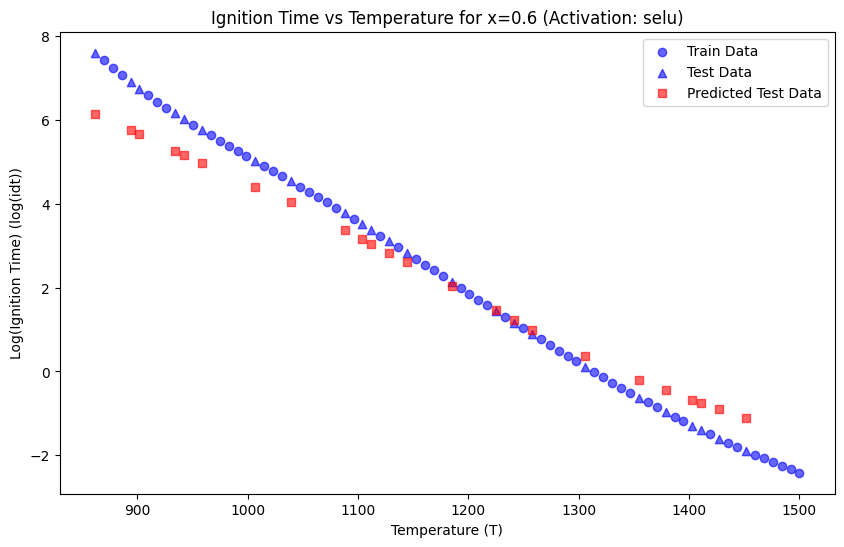

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Results for x=0.6 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.539062    1.963461
1   0.6  0.4  0.5   861.6162    7.596330       1.014648    6.581681
2   0.6  0.4  0.5  1039.3940    4.529353       1.396484    3.132869
3   0.6  0.4  0.5  1112.1210    3.368390       1.554688    1.813703
4   0.6  0.4  0.5  1007.0710    5.015671       1.321289    3.694382
5   0.6  0.4  0.5  1087.8790    3.767292       1.500977    2.266316
6   0.6  0.4  0.5   942.4242    6.013630       1.182617    4.831013
7   0.6  0.4  0.5  1427.2730   -1.603043       2.269531   -3.872575
8   0.6  0.4  0.5   893.9394    6.896028       1.078125    5.8179

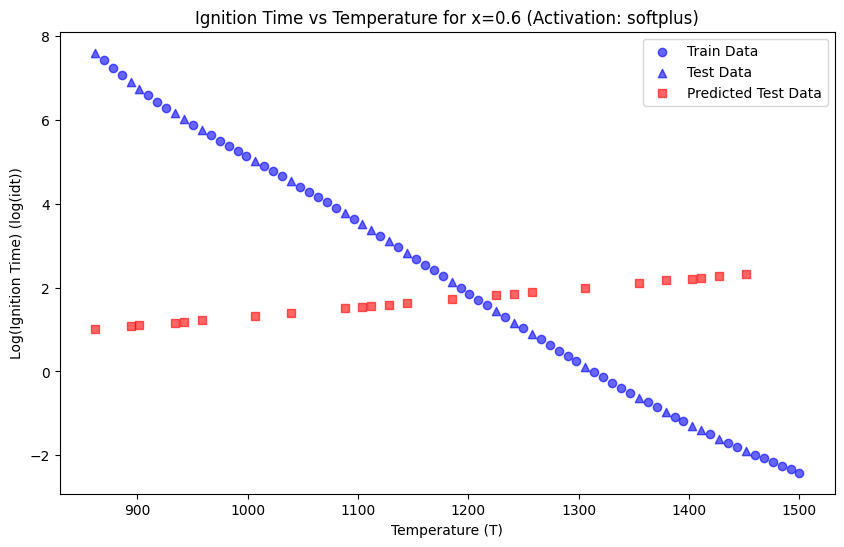

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 56: early stopping
Restoring model weights from the end of the best epoch: 46.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Results for x=0.6 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.998047    0.504477
1   0.6  0.4  0.5   861.6162    7.596330       6.007812    1.588517
2   0.6  0.4  0.5  1039.3940    4.529353       3.728516    0.800838
3   0.6  0.4  0.5  1112.1210    3.368390       2.908203    0.460187
4   0.6  0.4  0.5  1007.0710    5.015671       4.101562    0.914108
5   0.6  0.4  0.5  1087.8790    3.767292       3.173828    0.593464
6   0.6  0.4  0.5   942.4242    6.013630       4.898438    1.115192
7   0.6  0.4  0.5  1427.2730   -1.603043      -0.325195   -1.277848
8   0.6  0.4  0.5   893.9394    6.896028       5.554688    1.341341

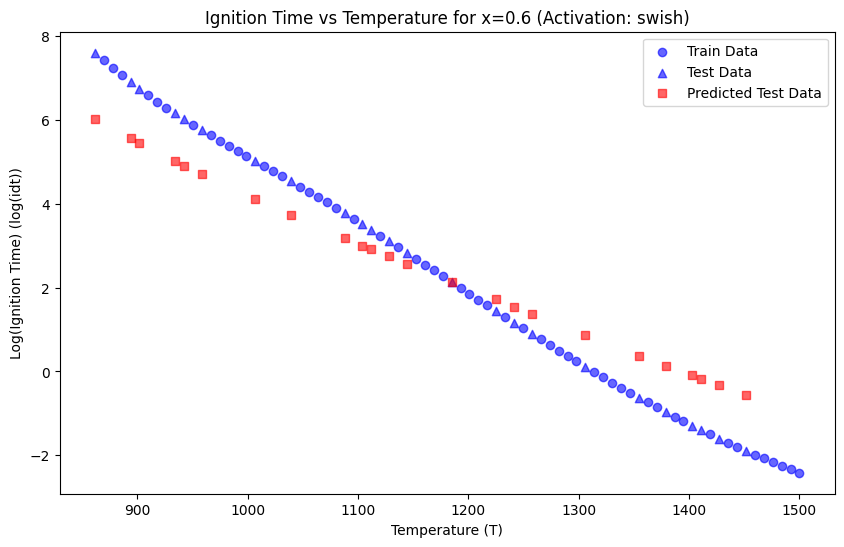

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Results for x=0.6 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.631836    1.870688
1   0.6  0.4  0.5   861.6162    7.596330       2.240234    5.356095
2   0.6  0.4  0.5  1039.3940    4.529353       1.875000    2.654353
3   0.6  0.4  0.5  1112.1210    3.368390       1.600586    1.767804
4   0.6  0.4  0.5  1007.0710    5.015671       1.966797    3.048874
5   0.6  0.4  0.5  1087.8790    3.767292       1.699219    2.068073
6   0.6  0.4  0.5   942.4242    6.013630       2.105469    3.908161
7   0.6  0.4  0.5  1427.2730   -1.603043      -0.168945   -1.434098
8   0.6  0.4  0.5   893.9394    6.896028       2.187500    4.708528


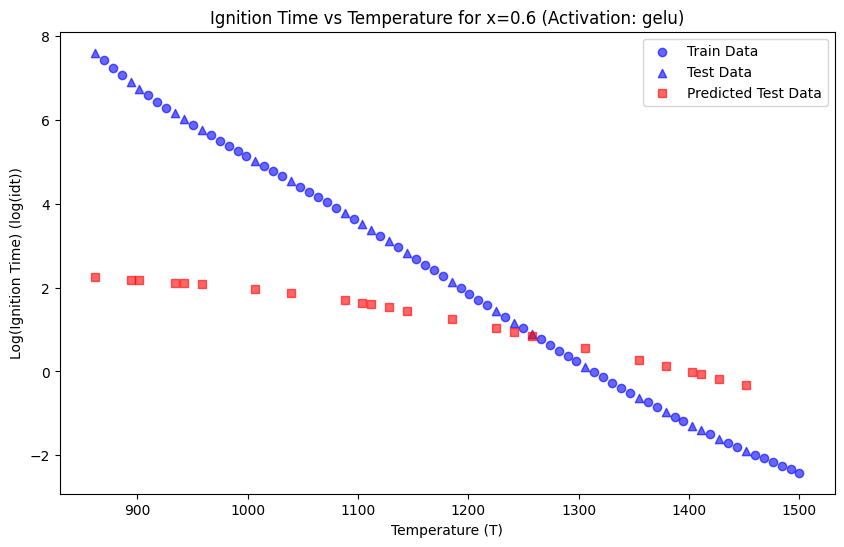

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Results for x=0.8 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.599609    5.697010
1   0.8  0.2  0.5  1427.2730   -1.236471       1.448242   -2.684713
2   0.8  0.2  0.5  1063.6360    4.561330       0.797852    3.763478
3   0.8  0.2  0.5   918.1818    6.808899       0.540039    6.268860
4   0.8  0.2  0.5  1144.4440    3.172562       0.944336    2.228226
5   0.8  0.2  0.5  1500.0000   -2.052887       1.578125   -3.631012
6   0.8  0.2  0.5   998.9899    5.574035       0.685547    4.888488
7   0.8  0.2  0.5  1192.9290    2.323434       1.030273    1.293161
8   0.8  0.2  0.5  1015.1520    5.329972       0.713867    4.616104
9

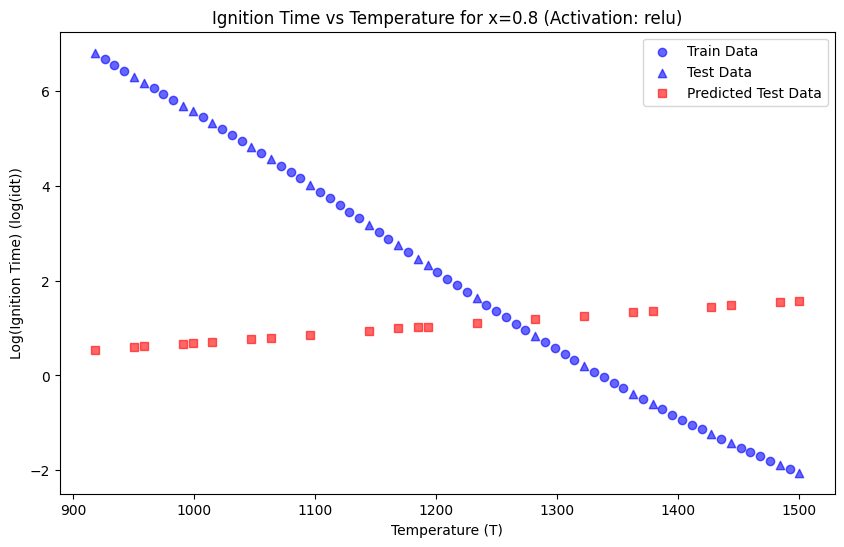

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.8 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       3.681641    2.614979
1   0.8  0.2  0.5  1427.2730   -1.236471       0.804199   -2.040670
2   0.8  0.2  0.5  1063.6360    4.561330       2.193359    2.367971
3   0.8  0.2  0.5   918.1818    6.808899       4.152344    2.656556
4   0.8  0.2  0.5  1144.4440    3.172562       1.886719    1.285843
5   0.8  0.2  0.5  1500.0000   -2.052887       0.187500   -2.240387
6   0.8  0.2  0.5   998.9899    5.574035       2.976562    2.597472
7   0.8  0.2  0.5  1192.9290    2.323434       1.746094    0.577340
8   0.8  0.2  0.5  1015.1520    5.329972       2.744141    2.5

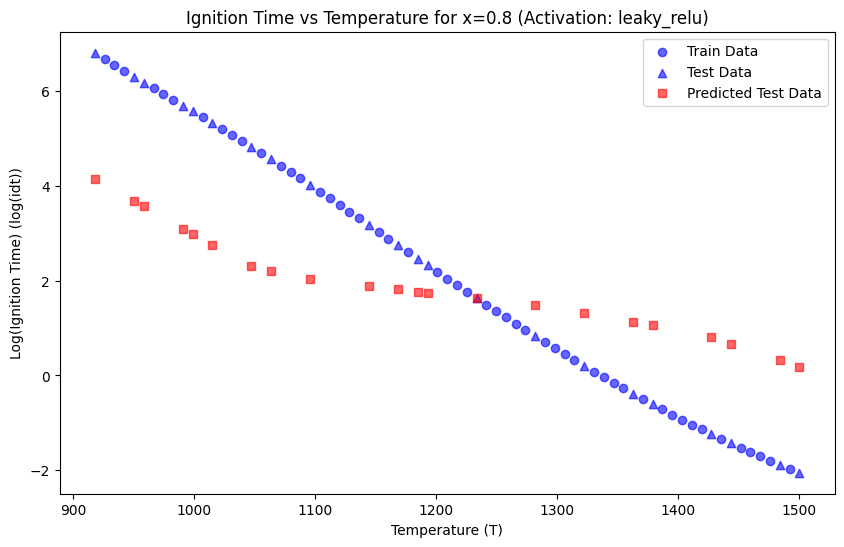

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Results for x=0.8 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.869141    5.427479
1   0.8  0.2  0.5  1427.2730   -1.236471       1.267578   -2.504049
2   0.8  0.2  0.5  1063.6360    4.561330       0.949219    3.612111
3   0.8  0.2  0.5   918.1818    6.808899       0.848633    5.960267
4   0.8  0.2  0.5  1144.4440    3.172562       1.014648    2.157913
5   0.8  0.2  0.5  1500.0000   -2.052887       1.334961   -3.387848
6   0.8  0.2  0.5   998.9899    5.574035       0.903809    4.670226
7   0.8  0.2  0.5  1192.9290    2.323434       1.052734    1.270700
8   0.8  0.2  0.5  1015.1520    5.329972       0.916016    4.413956
9  

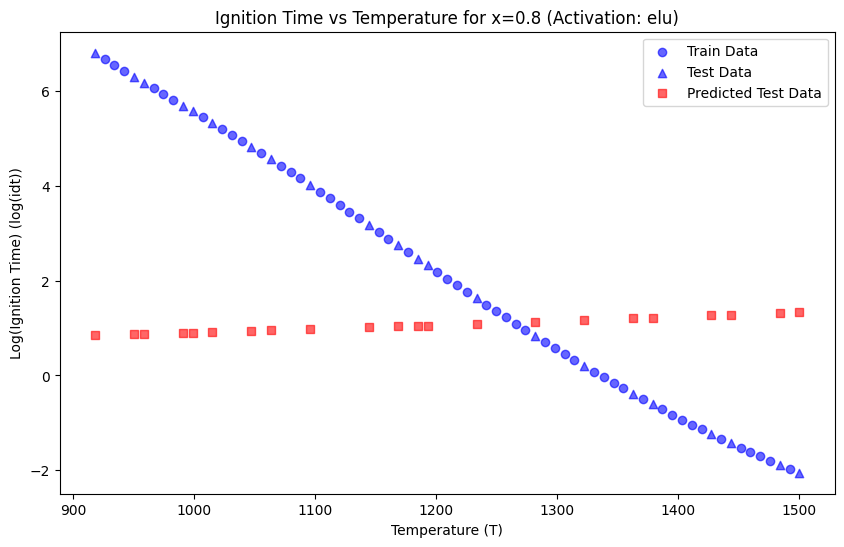

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Results for x=0.8 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.457520    5.839100
1   0.8  0.2  0.5  1427.2730   -1.236471       1.364258   -2.600729
2   0.8  0.2  0.5  1063.6360    4.561330       0.685547    3.875783
3   0.8  0.2  0.5   918.1818    6.808899       0.393311    6.415589
4   0.8  0.2  0.5  1144.4440    3.172562       0.838867    2.333695
5   0.8  0.2  0.5  1500.0000   -2.052887       1.503906   -3.556793
6   0.8  0.2  0.5   998.9899    5.574035       0.556641    5.017394
7   0.8  0.2  0.5  1192.9290    2.323434       0.937500    1.385934
8   0.8  0.2  0.5  1015.1520    5.329972       0.590820    4.739151
9 

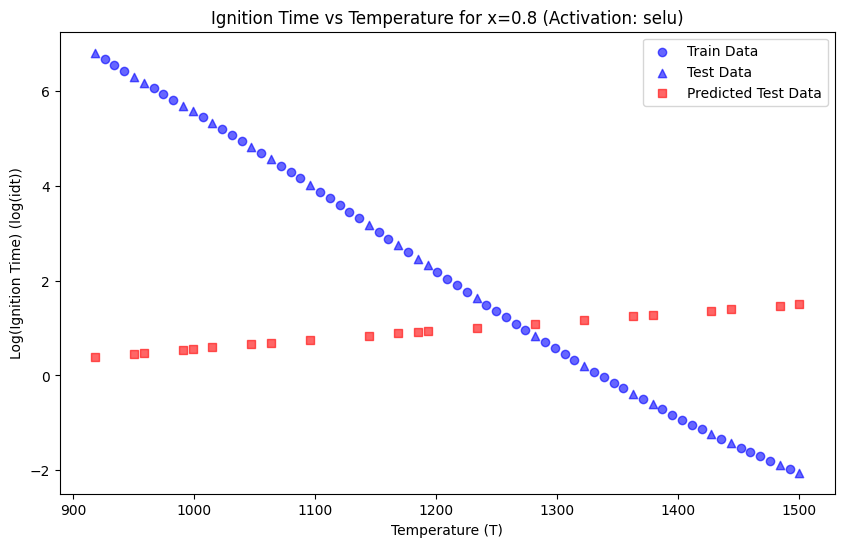

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.8 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       3.583984    2.712635
1   0.8  0.2  0.5  1427.2730   -1.236471       1.648438   -2.884908
2   0.8  0.2  0.5  1063.6360    4.561330       3.060547    1.500783
3   0.8  0.2  0.5   918.1818    6.808899       3.744141    3.064759
4   0.8  0.2  0.5  1144.4440    3.172562       2.714844    0.457718
5   0.8  0.2  0.5  1500.0000   -2.052887       1.412109   -3.464996
6   0.8  0.2  0.5   998.9899    5.574035       3.357422    2.216613
7   0.8  0.2  0.5  1192.9290    2.323434       2.509766

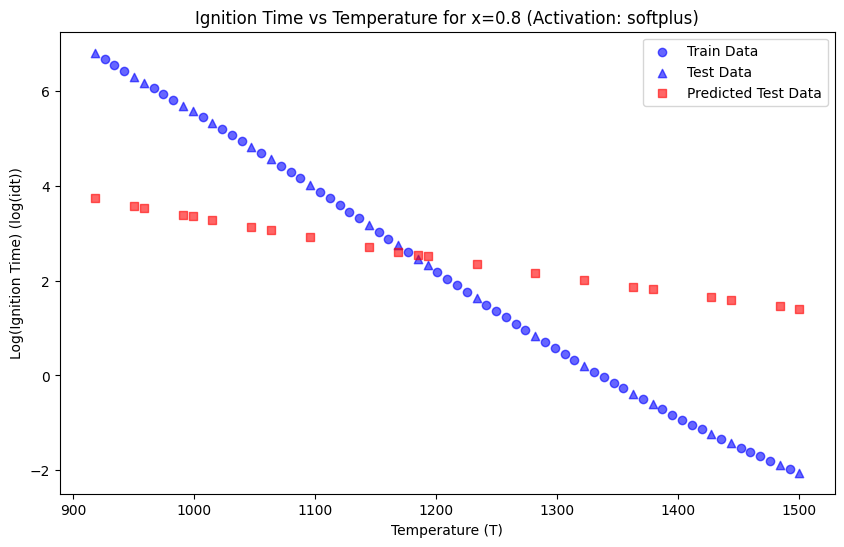

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Results for x=0.8 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       1.261719    5.034900
1   0.8  0.2  0.5  1427.2730   -1.236471       2.736328   -3.972799
2   0.8  0.2  0.5  1063.6360    4.561330       1.594727    2.966603
3   0.8  0.2  0.5   918.1818    6.808899       1.160156    5.648743
4   0.8  0.2  0.5  1144.4440    3.172562       1.849609    1.322952
5   0.8  0.2  0.5  1500.0000   -2.052887       2.953125   -5.006012
6   0.8  0.2  0.5   998.9899    5.574035       1.405273    4.168761
7   0.8  0.2  0.5  1192.9290    2.323434       2.003906    0.319528
8   0.8  0.2  0.5  1015.1520    5.329972       1.451172    3.878800
9

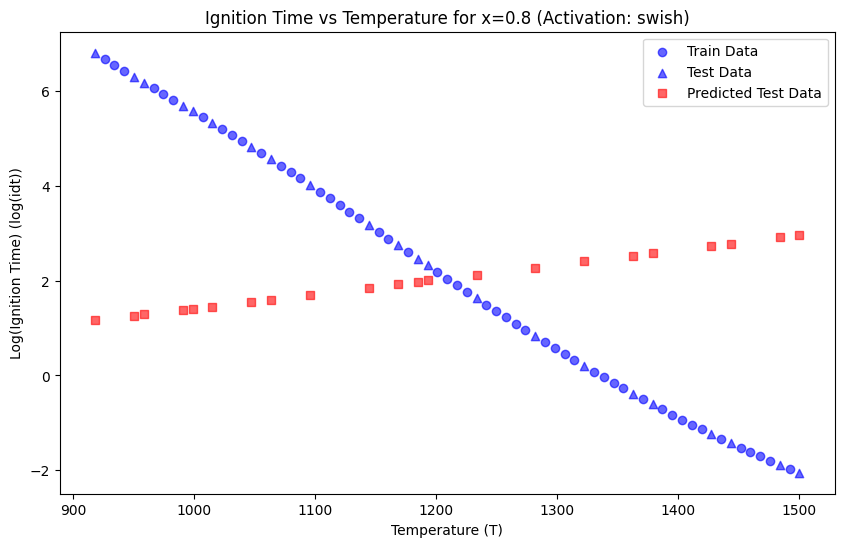

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Results for x=0.8 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       3.142578    3.154041
1   0.8  0.2  0.5  1427.2730   -1.236471       0.476562   -1.713033
2   0.8  0.2  0.5  1063.6360    4.561330       2.738281    1.823049
3   0.8  0.2  0.5   918.1818    6.808899       3.330078    3.478821
4   0.8  0.2  0.5  1144.4440    3.172562       2.439453    0.733109
5   0.8  0.2  0.5  1500.0000   -2.052887      -0.118347   -1.934540
6   0.8  0.2  0.5   998.9899    5.574035       2.935547    2.638488
7   0.8  0.2  0.5  1192.9290    2.323434       2.164062    0.159372
8   0.8  0.2  0.5  1015.1520    5.329972       2.882812    2.447159


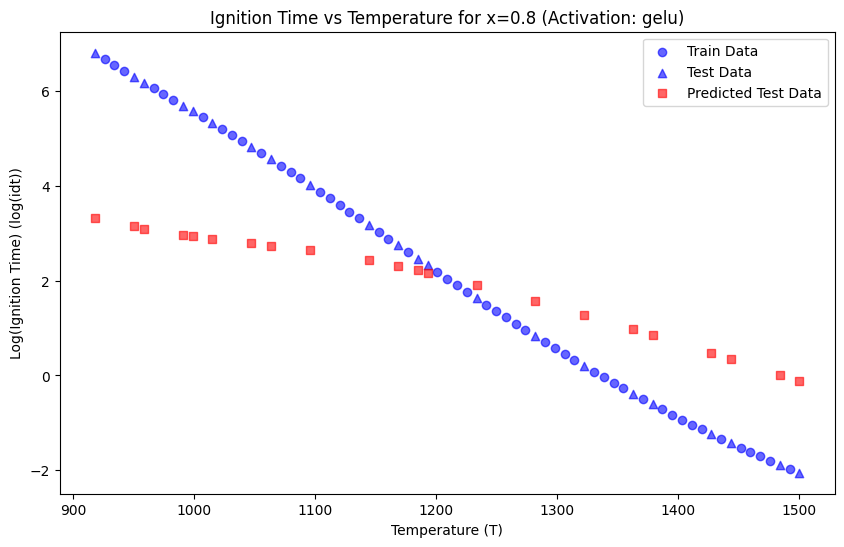

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Enable mixed precision for faster computation on compatible hardware
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Define the function to isolate specific x values and process the model training, testing, and visualization
def process_for_x_value(df, x_value, activation):
    # Step 1: Filter the data where x != x_value and select 70% of data where x == x_value
    df_not_x_value = df[df['x'] != x_value]
    df_x_value = df[df['x'] == x_value]
    train_x, test_x = train_test_split(df_x_value, test_size=0.3, random_state=42)

    # Combine all data where x != x_value with 70% of data where x = x_value
    train_df = pd.concat([df_not_x_value, train_x])
    test_df = test_x

    # Remove entries where `idt` is zero in both train and test sets and apply log transformation
    train_df = train_df[train_df['idt'] > 0]
    test_df = test_df[test_df['idt'] > 0]

    # Separate features and target, applying log transformation to `idt`
    X_train = train_df.drop(columns=['idt']).values
    y_train = np.log(train_df['idt'].values)
    X_test = test_df.drop(columns=['idt']).values
    y_test = np.log(test_df['idt'].values)

    # Step 2: Define the model with batch normalization and dropout for regularization
    model_tf = Sequential([
        Dense(16, input_shape=(6,), activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(8, activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)  # Output layer
    ])

    # Compile the model with Adam optimizer and weight decay
    model_tf.compile(optimizer=Adam(learning_rate=0.001, weight_decay=1e-5), loss='mse')

    # Callbacks for learning rate scheduling and early stopping
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

    # Train the model with a larger batch size for better performance
    model_tf.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=0, callbacks=[lr_scheduler, early_stopping])

    # Predict `idt` values for the test set
    test_predictions = model_tf.predict(X_test).flatten()

    # Calculate differences
    differences = y_test - test_predictions

    # Display results in a DataFrame
    comparison_df = pd.DataFrame({
        'x': test_df['x'].values,
        'y': test_df['y'].values,
        'phi': test_df['phi'].values,
        'T': test_df['T'].values,
        'Actual idt': y_test,
        'Predicted idt': test_predictions,
        'Difference': differences
    })

    # Print the comparison DataFrame
    print(f"Results for x={x_value} with activation={activation}:")
    print(comparison_df)

    # Step 3: Plot the results
    T_train = train_x[train_x['idt'] > 0]['T'].values  # Filter non-zero `idt` values in training data for plotting
    idt_train = np.log(train_x[train_x['idt'] > 0]['idt'].values)
    T_test = test_df['T'].values
    idt_test = y_test

    plt.figure(figsize=(10, 6))
    plt.scatter(T_train, idt_train, color='blue', marker='o', label='Train Data', alpha=0.6)
    plt.scatter(T_test, idt_test, color='blue', marker='^', label='Test Data', alpha=0.6)
    plt.scatter(T_test, test_predictions, color='red', marker='s', label='Predicted Test Data', alpha=0.6)

    plt.xlabel('Temperature (T)')
    plt.ylabel('Log(Ignition Time) (log(idt))')
    plt.title(f'Ignition Time vs Temperature for x={x_value} (Activation: {activation})')
    plt.legend()
    plt.show()

# List of x values to process and example activation functions
x_values_to_process = [0.2, 0.4, 0.6, 0.8]
activation_functions = ['relu', 'leaky_relu', 'elu', 'selu', 'softplus', 'swish', 'gelu']

# Example of running the process for each specified x value with a chosen activation
for x_value in x_values_to_process:
    for activation in activation_functions:
        process_for_x_value(df, x_value, activation)


Not good results

The predictions seem to be getting worse with every passing iteration